In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
import numpy as np
from cycler import cycler
import re
from pywaffle import Waffle

import glob

%matplotlib inline

import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [53]:
#Import style
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Futura Std',
    'font.style' : 'normal',
    'font.weight' : '100',
    'font.stretch' : 'ultra-condensed',
    
    'figure.facecolor'    : '#FDF6E3',

    
    'patch.antialiased'   : True,

    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',

    'axes.titlesize'      : 16,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#268BD2','#d26c3d', '#dbd7ad', '#f6c5af', '#d7da00', '#7db49f', '#86a3ba']),

    'axes.grid'           : False,
    'grid.color'          : '#ffffff',    # grid color
    'grid.linestyle'      : ':',         # line
    'grid.linewidth'      : 1,        # in points

    ### TICKS
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',
    'xtick.bottom'           : False,
    'xtick.labelsize' : 14,
    'ytick.left'           : False,
    'ytick.labelsize' : 14,

    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    
})

In [3]:
df = pd.read_csv("Civilian_Complaint_Review_Board__CCRB__-_Complaints_Closed.csv")
df.head()

,Extract Run Date,Randomized Id,Closed Year,Case Type,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Outcome Path,Case Disposition,Borough Of Incident,Patrol Borough Of Incident,"Stop, Question, Frisk Complaint"
0,05/25/2018,1,2000,CCRB,80,False,False,Truncated,Complainant Uncooperative,Brooklyn,Brooklyn North,False
1,05/25/2018,2,2000,CCRB,391,False,False,Full Investigation,Unsubstantiated,Manhattan,Manhattan South,True
2,05/25/2018,3,2000,CCRB,193,False,False,Mediated,Mediated,Bronx,Bronx,False
3,05/25/2018,4,2000,CCRB,412,False,False,Full Investigation,Unfounded,Manhattan,Manhattan North,False
4,05/25/2018,5,2000,CCRB,394,False,False,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn South,False


In [4]:
df['Extract Run Date'] = pd.to_datetime(df['Extract Run Date'])

In [5]:
df['Outcome Path'].value_counts()

Truncated              60942
Full Investigation     38102
Mediation Attempted     2553
Mediated                2195
Other                    939
Name: Outcome Path, dtype: int64

# Waffles! 
## normalize this by population (of people in borough)
## maybe by population of police instead/also

In [6]:
df['Borough Of Incident'].value_counts()

Brooklyn         34891
Manhattan        25608
Bronx            22797
Queens           16527
Staten Island     4319
Outside NYC         97
Name: Borough Of Incident, dtype: int64

In [7]:
calculated = df['Borough Of Incident'].value_counts(normalize=True)*100

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=list(calculated.values),
    labels=list(calculated.index),
    figsize=(11,6),
    legend={'loc':'upper left','bbox_to_anchor': (1.1, 1)},
    colors = ('#268BD2','#d26c3d', '#dbd7ad', '#f6c5af', '#d7da00', '#7db49f')
)

# plt.savefig('borowaffleCsize.svg')

In [8]:
calculated

Brooklyn         33.472117
Manhattan        24.566621
Bronx            21.869934
Queens           15.854910
Staten Island     4.143363
Outside NYC       0.093055
Name: Borough Of Incident, dtype: float64

In [9]:
df['Patrol Borough Of Incident'].value_counts()

Bronx              22640
Brooklyn North     19686
Brooklyn South     14886
Manhattan North    13492
Manhattan South    11614
Queens South        9673
Queens North        6760
Staten Island       4296
Other               1684
Name: Patrol Borough Of Incident, dtype: int64

In [10]:
df['Stop, Question, Frisk Complaint'].value_counts()

False    78067
True     26664
Name: Stop, Question, Frisk Complaint, dtype: int64

In [11]:
df['Days From Received Date To Case Closing'].plot(kind='hist', bins= 49, range=(0,700), figsize=(14,8))
# plt.savefig('histBsize.svg')

In [12]:
df['Case Disposition'].value_counts()

Complainant Uncooperative                   30796
Unsubstantiated                             17206
Complaint Withdrawn                         12477
Complainant Unavailable                     10341
Exonerated                                   7001
Unfounded                                    6914
Alleged Victim Uncooperative                 4690
Substantiated (Charges)                      2712
Mediation Attempted                          2553
Officer(s) Unidentified                      2254
Mediated                                     2195
Alleged Victim Unavailable                   1955
Substantiated (Command Discipline)            766
Victim Unidentified                           577
Substantiated (Formalized Training)           358
Administratively Closed                       326
Substantiated (Command Discipline A)          279
Substantiated (Instructions)                  278
Substantiated (Command Discipline B)          210
Miscellaneous - Subject Retired               210


In [13]:
df.shape

(104731, 12)

In [14]:
df.groupby(['Closed Year', 'Borough Of Incident'])['Randomized Id'].count().reset_index()

,Closed Year,Borough Of Incident,Randomized Id
0,2000,Bronx,923
1,2000,Brooklyn,1457
2,2000,Manhattan,1494
3,2000,Outside NYC,6
4,2000,Queens,838
5,2000,Staten Island,258
6,2001,Bronx,687
7,2001,Brooklyn,1174
8,2001,Manhattan,977
9,2001,Outside NYC,6


In [15]:
df.count()

Extract Run Date                           104731
Randomized Id                              104731
Closed Year                                104731
Case Type                                  104731
Days From Received Date To Case Closing    104731
Re-opened                                  104731
Ever On DA Hold                            104731
Outcome Path                               104731
Case Disposition                           104731
Borough Of Incident                        104239
Patrol Borough Of Incident                 104731
Stop, Question, Frisk Complaint            104731
dtype: int64

In [16]:
import altair as alt
from vega_datasets import data

source = df.groupby(['Closed Year', 'Borough Of Incident'])['Randomized Id'].count().reset_index()

alt.Chart(source).mark_area().encode(
    x = source['Closed Year'],
    y = source['Randomized Id'],
#     alt.Color('series:N',
#         scale=alt.Scale(scheme='category20b')
#     )
).interactive()

SchemaValidationError: Invalid specification

        altair.vegalite.v2.schema.channels.X->field, validating 'anyOf'

        0      2000
1      2000
2      2000
3      2000
4      2000
5      2000
6      2001
7      2001
8      2001
9      2001
10     2001
11     2001
12     2002
13     2002
14     2002
15     2002
16     2002
17     2002
18     2003
19     2003
20     2003
21     2003
22     2003
23     2003
24     2004
25     2004
26     2004
27     2004
28     2004
29     2004
       ... 
78     2013
79     2013
80     2013
81     2013
82     2013
83     2013
84     2014
85     2014
86     2014
87     2014
88     2014
89     2014
90     2015
91     2015
92     2015
93     2015
94     2015
95     2015
96     2016
97     2016
98     2016
99     2016
100    2016
101    2016
102    2017
103    2017
104    2017
105    2017
106    2017
107    2017
Name: Closed Year, Length: 108, dtype: int64 is not valid under any of the given schemas
        

Chart({
  data:      Closed Year Borough Of Incident  Randomized Id
  0           2000               Bronx            923
  1           2000            Brooklyn           1457
  2           2000           Manhattan           1494
  3           2000         Outside NYC              6
  4           2000              Queens            838
  5           2000       Staten Island            258
  6           2001               Bronx            687
  7           2001            Brooklyn           1174
  8           2001           Manhattan            977
  9           2001         Outside NYC              6
  10          2001              Queens            620
  11          2001       Staten Island            203
  12          2002               Bronx            937
  13          2002            Brooklyn           1610
  14          2002           Manhattan           1250
  15          2002         Outside NYC              5
  16          2002              Queens            790
  17          

In [17]:
source.plot(kind='bar',x='Closed Year', y='Randomized Id', figsize=(20,6))

In [18]:
source.keys()

Index(['Closed Year', 'Borough Of Incident', 'Randomized Id'], dtype='object')

In [19]:
source = df.groupby(['Closed Year', 'Borough Of Incident'])['Randomized Id'].count().reset_index()
source.head()

,Closed Year,Borough Of Incident,Randomized Id
0,2000,Bronx,923
1,2000,Brooklyn,1457
2,2000,Manhattan,1494
3,2000,Outside NYC,6
4,2000,Queens,838


/Users/sabi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


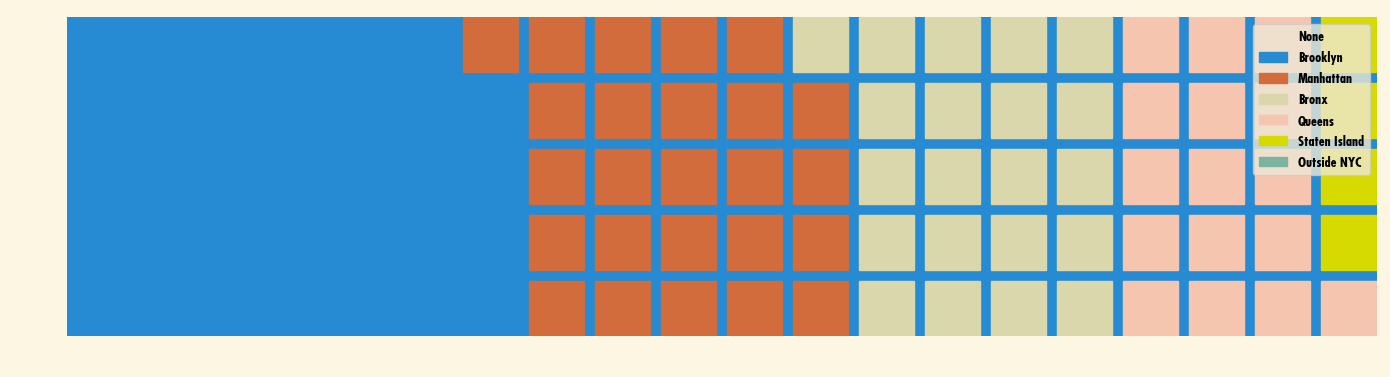

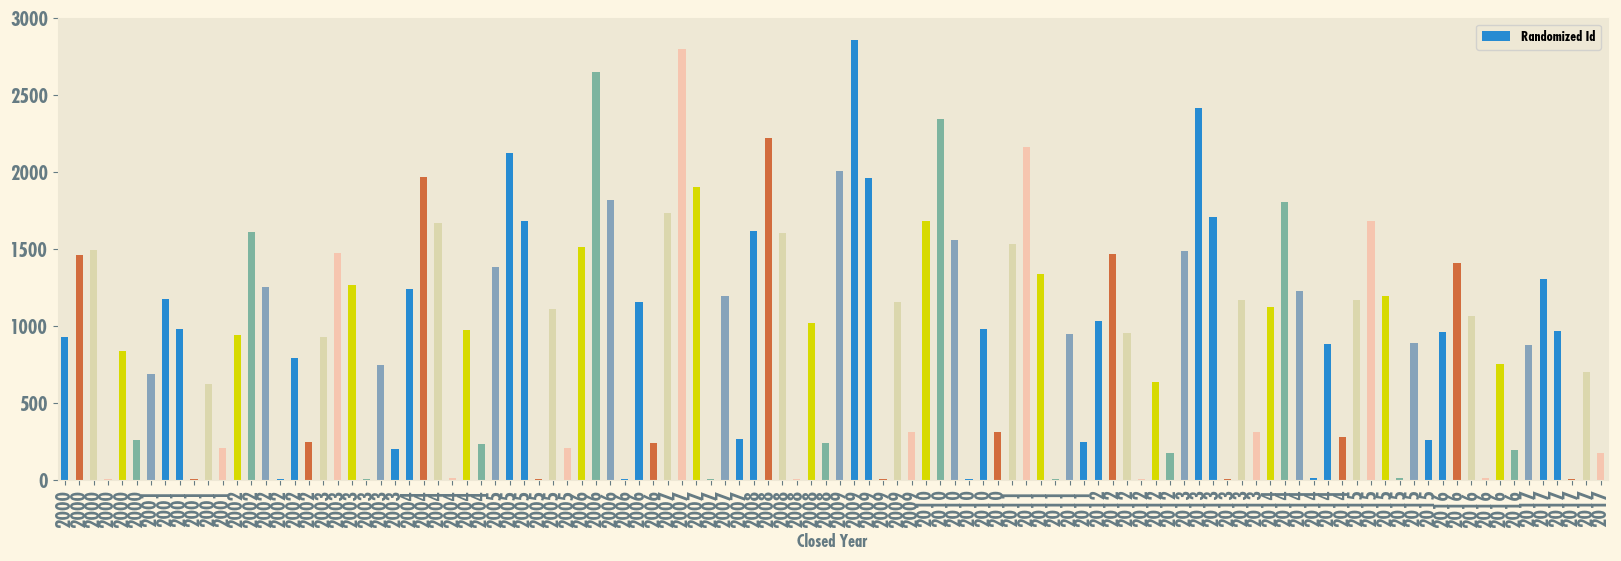

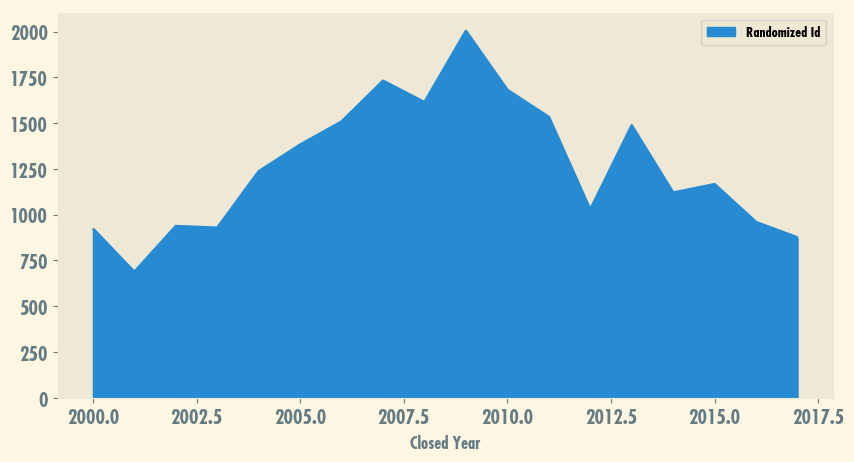

In [20]:
source[source['Borough Of Incident'] == 'Bronx'].plot(kind='area', x='Closed Year', y='Randomized Id', figsize=(10,5))
plt.show()

In [31]:
years = df['Closed Year'].unique().tolist()

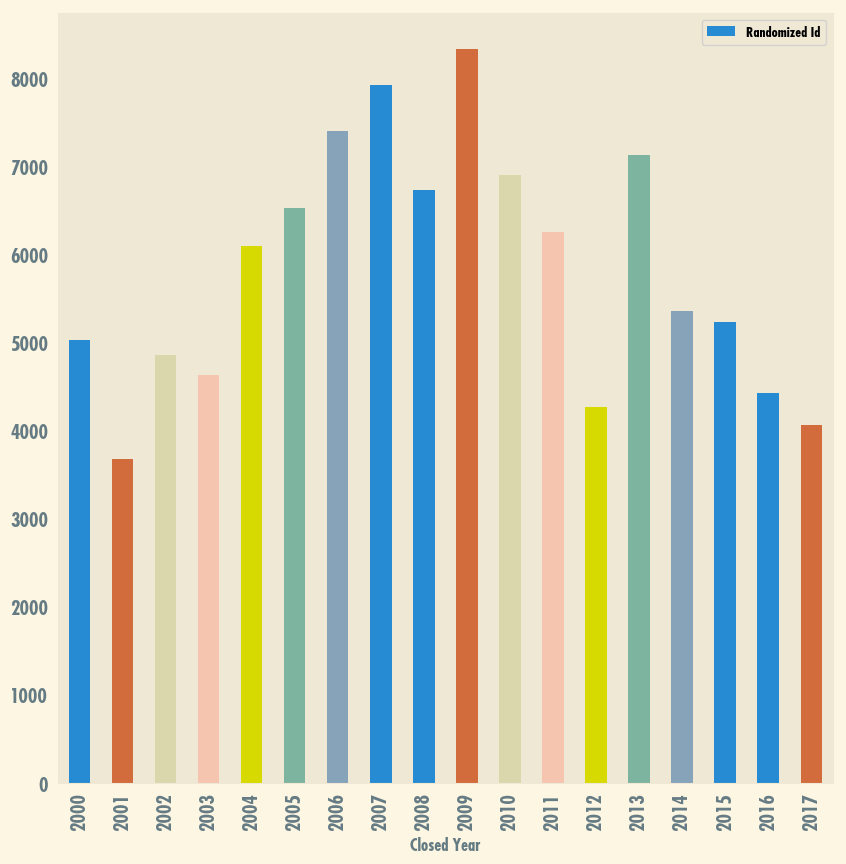

In [59]:
tseries= df.groupby('Closed Year')['Randomized Id'].count().reset_index()

tseries.plot(kind='bar', x='Closed Year', y='Randomized Id', figsize=(10,10), xticks=(years))

plt.savefig('timeseries.svg')

plt.show()

range(0, 10)